<h1>Regressão Linear Simples usando o TensorFlow - Predição de Salário em Função dos anos de experiência</h1>

<p>Neste Notebook veremos um exemplo simples de regressão linear, usando as bibliotecas tensorflow, sklearn,pandas e matplotlib.</p>
    <p>Para o tensorflow usaremos o high level api(estimators), pois o nivel de abstração é maior e consequentemente perderemos menos tempo para treinar o nosso modelo.</p> 
   <p>A base de dados utilizada foi fornecida pelo site Kaggle, onde o link encontra-se a seguir:</p>
<p> <a href ="https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression">Clique Aqui para ser direcionado a base de dados do Kaggle</a></p>
  

<h3>Introdução</h3>

<p>Para este problema devemos ser capazes de predizer a remuneração de uma pessoa a partir de uma base de dados previamente conhecida, contendo anos de experiência de determinados funcionários em uma empresa e seus respectivos salários.</p>

<h3>Importando os Módulos necessários</h3>

<p>Para iniciarmos devemos importar os módulos.</p>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

<h3>Importando os Dados</h3>

<p>Usaremos a biblioteca pandas para criarmos um dataframe e assim podermos importar os dados.</p>

In [2]:
base = pd.read_csv("/home/gabriel/Downloads/Salary_Data.csv")

<p>Antes de prosseguirmos, vamos confirmar que nosso arquivo base está importado corretamente para isso veremos 
o seu tipo, seu shape e seus 5 primeiros dados :</h>

In [3]:
type(base)

pandas.core.frame.DataFrame

In [4]:
base.shape

(30, 2)

In [5]:
base.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<p>Uma vez importado corretamente a nossa base devemos criar dois tipos de dataframes, separando assim as variáveis dependentes das variáveis independentes.</p>
<p>Para isso usaremos o método iloc para realizarmos a indexação... Lembrando que esta indexação em python é realizada inicialmente do numero 0 (zero).</p>
<p>Devemos ainda lembrar que o nosso principal objetivo é trabalharmos numericamente com esses valores, realizando assim calculos matemáticos e para isso devemos transformar nosso dataframe em um array numpy.</p>
<p>Para tal usaremos o método values</p>

In [6]:
 x = base.iloc[:,0:1].values
 y = base.iloc[:,1:2].values

<p>Conferiremos assim o tipo e o shape dos arrays criados: </p>

In [7]:
type(x)

numpy.ndarray

In [43]:
type(y)

numpy.ndarray

In [8]:
x.shape

(30, 1)

In [9]:
y.shape

(30, 1)

<h3>Visualizando os Dados</h3>

<p>É de suma importancia que antes de iniciarmos o nosso modelo preditivo tenhamos a certeza que a regressão linear é um bom metodo para a resolução do problema e para isso plotaremos um grafico relacionando as duas variáveis.</p>

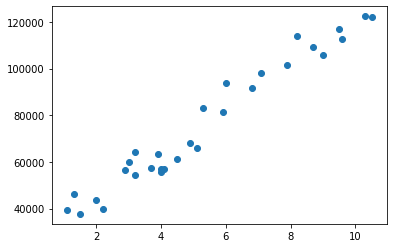

In [10]:
plt.plot(x,y,"o")

<h3>Escalonando os Dados</h3>

<p>Como os dados possuem escalas diferente, precisamos escalona-los e para isso utilizaremos o módulo sklearn.</p>

In [11]:
x_scaler = StandardScaler().fit(x)
y_scaler = StandardScaler().fit(y)
x = x_scaler.transform(x)
y = y_scaler.transform(y)

<p>Visto que o escalonamento ja foi realizado plotaremos novamente as variaveis para termos a certeza que a relação linear não foi perdida.</p>

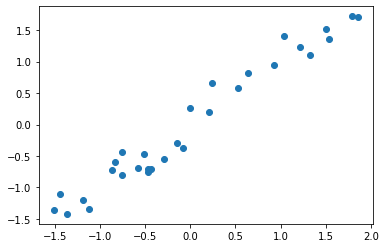

In [12]:
plt.plot(x,y,"o")

<h3>Criando conjunto de Treino e Conjunto de Testes</h3>

<p>Depois de ja realizado o escalonamento, precisamos então subdividirmos os nossos dados em <b> conjunto de treino</b> e em <b> conjunto de testes</b>, para que assim possamos treinar e avaliar o nosso algoritmo.</p>
<p>Usaremos mais uma vez o modulo sklearn para realizarmos tal ação.</p>

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size  =0.333,shuffle = True)

<p>Visto que configuramos o conjunto de teste como sendo 33% do conjunto de dados, esperamos então os arrays de teste com tamanho de 10 unidades e os arrays de treino com 20 unidades. </p>

In [14]:
x_train.shape

(20, 1)

In [15]:
y_train.shape

(20, 1)

In [16]:
x_test.shape

(10, 1)

In [17]:
y_test.shape

(10, 1)

 <h3>Criando o modelo de regressão</h3>

<p>Aqui criaremos um placeholder para armazenar a variavel x.</p>

In [18]:
colum_x = [tf.feature_column.numeric_column("x",shape=[1])]

<p>Instanciaremos então um regressor linear, onde daremos a ele o placeholder criado acima.</p>

In [19]:
regressor = tf.estimator.LinearRegressor(feature_columns=colum_x)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpovwbx4lw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0612d06550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


<h3>Treinando o modelo </h3>

<p>Vamos agora definir o conjunto de treinamento no tensorflow e junto dessa definição colocaremos alguns parametros importantes para que o treinamento seja realizado com sucesso, são eles :</p>
<p>Batch_size: Tamanho do lote de cada lote </p>
<p>num_epochs: Numero de rodadas pelo conjunto de treino completo</p>

In [20]:
conjunto_treinamento = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size = 2,
                                                           num_epochs = None,shuffle = True)

<p>Visto que tudo está pronto, basta então realizarmos o treinamento: </p>

In [21]:
regressor.train(conjunto_treinamento,steps = 10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpovwbx4lw/mo

INFO:tensorflow:loss = 0.08457695, step = 4001 (0.166 sec)
INFO:tensorflow:global_step/sec: 702.5
INFO:tensorflow:loss = 0.09029116, step = 4101 (0.142 sec)
INFO:tensorflow:global_step/sec: 628.306
INFO:tensorflow:loss = 0.17089608, step = 4201 (0.159 sec)
INFO:tensorflow:global_step/sec: 690.681
INFO:tensorflow:loss = 0.07471736, step = 4301 (0.145 sec)
INFO:tensorflow:global_step/sec: 692.095
INFO:tensorflow:loss = 0.00026261157, step = 4401 (0.145 sec)
INFO:tensorflow:global_step/sec: 720.51
INFO:tensorflow:loss = 0.07157182, step = 4501 (0.139 sec)
INFO:tensorflow:global_step/sec: 765.066
INFO:tensorflow:loss = 0.02099699, step = 4601 (0.131 sec)
INFO:tensorflow:global_step/sec: 691.981
INFO:tensorflow:loss = 0.08763631, step = 4701 (0.145 sec)
INFO:tensorflow:global_step/sec: 716.124
INFO:tensorflow:loss = 0.01688317, step = 4801 (0.140 sec)
INFO:tensorflow:global_step/sec: 722.088
INFO:tensorflow:loss = 0.009110118, step = 4901 (0.139 sec)
INFO:tensorflow:global_step/sec: 711.188

<p>Para termos uma ideia de como o nosso modelo se comportou, vamos salvar em uma variável suas métricas: <p>

In [22]:
metricas_treino = regressor.evaluate(conjunto_treinamento,steps =10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:14:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpovwbx4lw/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Finished evaluation at 2020-01-26-14:14:53
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.035439037, global_step = 10000, label/mean = -0.057095386, loss = 0.07087807, prediction/mean = -0.05086288
INFO:tensorflow:Saving 'checkpoint_

<h3>Testando o Modelo</h3>

<p>Criaremos o conjunto de Teste, definindo os parâmetros da mesma forma que anteriormente. </p>

In [23]:
conjunto_teste = tf.estimator.inputs.numpy_input_fn({"x":x_test},y_test,batch_size = 2,
                                                           num_epochs = 1000,shuffle = False)

<p>Para termos uma ideia de como o nosso modelo se comportou diante do conjunto de teste, vamos salvar em uma variável suas métricas: <p>

In [24]:
metricas_teste = regressor.evaluate(conjunto_teste,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-26T14:15:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpovwbx4lw/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-01-26-14:15:07
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.06160666, global_step = 10000, label/mean = 0.112793826, loss = 0.12321332, prediction/mean = 0.16869582
INFO:tensorflow:Saving 'checkpoint_path' summary for globa

<h3>Avaliando o Modelo </h3>

In [25]:
metricas_teste

{'average_loss': 0.06160666,
 'label/mean': 0.112793826,
 'loss': 0.12321332,
 'prediction/mean': 0.16869582,
 'global_step': 10000}

In [26]:
metricas_treino

{'average_loss': 0.035439037,
 'label/mean': -0.057095386,
 'loss': 0.07087807,
 'prediction/mean': -0.05086288,
 'global_step': 10000}

<p>Avaliando o nosso modelo podemos ver que : </p>

In [27]:
if metricas_treino["loss"] > metricas_teste["loss"]:
    print("O Conjunto de Teste teve um desempenho melhor que o conjunto de treino, com um erro de:", 
          metricas_teste["loss"])
else:
    print("O Conjunto de Treino teve um desempenho melhor que o conjunto de teste, com um erro de:", 
          metricas_treino["loss"])

O Conjunto de Treino teve um desempenho melhor que o conjunto de teste, com um erro de: 0.07087807


<h3>Realizando Predições</h3>

<p>Este é o momento de realizarmos predições, ou seja, entraremos com novos valores de experiência de cada colaborador e o modelo que treinamos nos retornará o salário ideal.</p>
<p>Para isso criaremos um array com os seguintes anos de experiência:</p>
<p>10 anos</p>
<p>11 anos</p>
<p>12 anos</p>
<p>13 anos</p>

In [46]:
predict_x = np.array([[10.0],[11.0],[12.0],[13.0]])

<p>Como foi visto outrora necessitamos escalonar esses dados:</p>

In [48]:
predict_x = x_scaler.transform(predict_x)

<p>Instanciaremos então o objeto que irá fazer as predições e alimentaremos o mesmo com o placeholder x, que por sua vez foi alimentado com o array que escalonamos no passo anterior.</p>

In [39]:
predict_model =tf.estimator.inputs.numpy_input_fn({"x":predict_x},shuffle=False)

<p>Para vermos os resultados da predição faremos um loop for e guardaremos em um array.</p>

In [54]:
salarios=[]
for i in regressor.predict(input_fn = predict_model):
    salarios.append(i["predictions"])

salarios_np_normalizados= np.asarray(salarios).reshape(-1,1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpovwbx4lw/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<p>Por fim faremos a operação inversa do escalonamento e obteremos as predições reais.</p>

In [56]:
salarios_np =y_scaler.inverse_transform(salarios_np_normalizados)
salarios_np

array([[119793.45],
       [129005.53],
       [138217.61],
       [147429.69]], dtype=float32)